<div align="center">
<h2>Can Age and Experience Predict Playtime? A KNN Regression Analysis of Minecraft Server Data</h2

Leena Tagourti, Julie Sieg

# Introduction 

**Background**

Understanding the factors that influence player engagement is crucial in the gaming industry, as it informs game design, marketing strategies, and resource allocation. In this study, we explore the predictive relationship between a player's age and experience on the total time they spend playing on a Minecraft server. Specifically, we use k-Nearest Neighbors (KNN) regression to estimate the number of hours a player dedicates to the game based on these demographic factors.

The Pacific Laboratory for Artificial Intelligence (PLAI) at the University of British Columbia has initiated a project that integrates Minecraft gameplay with artificial intelligence research. By hosting a Minecraft server, PLAI aims to collect detailed gameplay data to advance AI methodologies. Participants register on plaicraft.ai, consent to data collection, and engage in gameplay, contributing valuable data for research purposes. This initiative not only supports AI advancements but also provides players with free access to Minecraft, creating a collaborative research environment.

**Research Question**

This study seeks to answer the following question: Can a player's age and gaming experience predict the total time they spend playing on the PLAI Minecraft server? By addressing this question, we aim to identify whether these demographic factors are significant indicators of player engagement, which could inform targeted recruitment strategies and resource planning for gaming platforms.

**Data Description**

The dataset utilized in this analysis is made up of player information collected from the PLAI Minecraft server. It includes demographic details such as age and self-reported gaming experience, along with behavioral data like total hours spent on the server. The dataset includes a diverse player base, providing a detailed view of engagement patterns across different age groups and experience levels. Prior to analysis, the data underwent wrangling; cleaning and preprocessing to ensure accuracy and consistency, including handling missing values and standardizing data formats. By making use of KNN regression on this dataset, we aim to uncover the relationship between age, experience, and player engagement, contributing to a deeper understanding of factors influencing gaming behavior.

**Table 1: Description of Dataset Variables**

| **Variable Name**     | **Data Type** | **Description**                                                                                   | **Example Value**                                                                                   |
|-----------------------|---------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| `experience`          | Factor        | Player's self-reported proficiency level in gaming, categorized as 'Amateur' or 'Pro'.            | Pro                                                                                                 |
| `subscribe`           | Logical       | Indicates if the player has subscribed to the game-related newsletter (`TRUE` or `FALSE`).        | TRUE                                                                                                |
| `hashed_email`        | Character     | Hashed representation of the player's email address for anonymity.                                | f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d                                    |
| `played_hours`        | Double        | Total number of hours the player has spent on the server.                                         | 30.3                                                                                                |
| `name`                | Character     | Player's in-game username.                                                                        | Morgan                                                                                              |
| `gender`              | Factor        | Player's self-identified gender.                                                                  | Male                                                                                                |
| `age`                 | Double        | Player's age in years.                                                                            | 9                                                                                                   |
| `start_time`          | Character     | Start timestamp of a specific gaming session, formatted as 'dd/mm/yyyy hh:mm'.                    | 08/08/2024 00:21                                                                                    |
| `end_time`            | Character     | End timestamp of the corresponding gaming session, formatted as 'dd/mm/yyyy hh:mm'.               | 08/08/2024 01:35                                                                                    |
| `original_start_time` | Double        | Original start time represented as a Unix timestamp (milliseconds since epoch).                   | 1.72308e+12                                                                                         |
| `original_end_time`   | Double        | Original end time represented as a Unix timestamp (milliseconds since epoch).                     | 1.72308e+12                                                                                         |


# Methods and Results

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra) 
library(ggplot2)
library(RColorBrewer)
library(lubridate)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Read the files into R
url_players <- "https://raw.githubusercontent.com/JulieSieg/dsci_100_independentproject/refs/heads/main/players.csv"
players <- read_csv(url_players)
players

url_sessions <- "https://raw.githubusercontent.com/JulieSieg/dsci_100_independentproject/refs/heads/main/sessions.csv"
sessions <- read_csv(url_sessions)
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
sessions_as_date <- sessions |> 
    mutate(start_datetime = dmy_hm(start_time)) |>
    mutate(end_datetime = dmy_hm(end_time)) |>
    mutate(time_played = end_datetime - start_datetime) |>
    select(hashedEmail, time_played)

sessions_as_date

hashedEmail,time_played
<chr>,<drtn>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,12 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,13 mins
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,23 mins
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,21 mins
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,7 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,19 mins


In [27]:
# Merge the datasets 
merged_data <- players |>
  left_join(sessions_as_date, by = "hashedEmail")

# Rename columns in merged_data
colnames(merged_data) <- c("experience", "subscribe", "hashedEmail", "played_hours", "name", "gender", "age", 
                           "time_played")

session_counts <- merged_data |>
  group_by(hashedEmail) |>
  summarise(total_sessions = n())

played_mins <- merged_data |>
    group_by(hashedEmail, experience, age) |>
    summarize(total_mins = sum(time_played, na.rm = TRUE)) |>
    mutate(total_mins = as.numeric(total_mins))

player_sessions <- session_counts |>
    left_join(played_mins, by = "hashedEmail") |>
    mutate(experience = as_factor(experience)) |>
    drop_na(age)
player_sessions

`summarise()` has grouped output by 'hashedEmail', 'experience'. You can
override using the `.groups` argument.


hashedEmail,total_sessions,experience,age,total_mins
<chr>,<int>,<fct>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,Regular,20,106
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1,Veteran,17,0
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,Pro,21,30
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,23,4795
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,Amateur,17,9
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,Beginner,20,72


In [28]:
# Change experience and gender to a factor and combine with new column names 

# player_sessions <- players_merged |>
#   mutate(experience = as_factor(experience),
#         gender = as_factor(gender)) |>
#     drop_na(age)
# player_sessions



**Exploratory Visualizations**

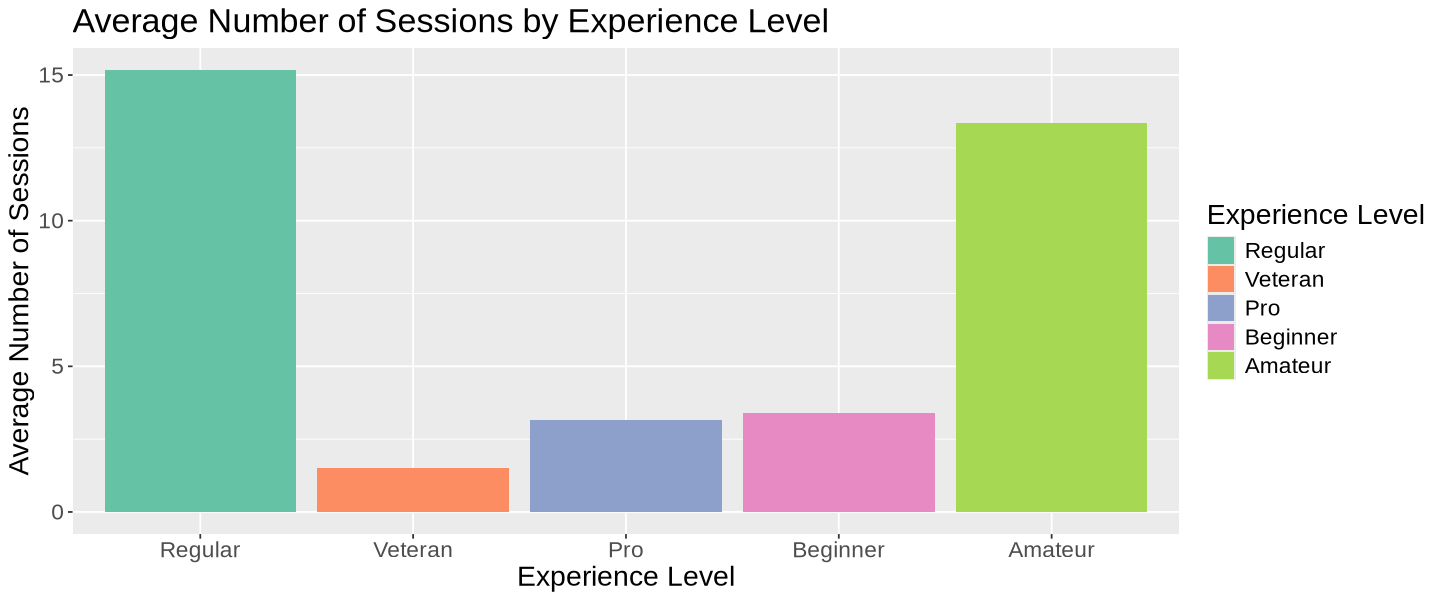

In [30]:
#sorry I broke this - oops

options(repr.plot.width = 12, repr.plot.height = 5)
# Count total sessions per player
# session_counts <- player_sessions |>
#   group_by(hashed_email) |>
#   summarise(total_sessions = n())

# Merge session counts with experience level
session_experience <- player_sessions |>
  select(hashedEmail, experience) |>
  distinct() |>
  left_join(session_counts, by = "hashedEmail")

# Bar plot of total sessions by experience level
ggplot(session_experience, aes(x = experience, y = total_sessions, fill = experience)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(title = "Average Number of Sessions by Experience Level",
       x = "Experience Level",
       y = "Average Number of Sessions",
       fill = "Experience Level") +
  scale_fill_brewer(palette = "Set2") +  
  theme(text = element_text(size = 17))

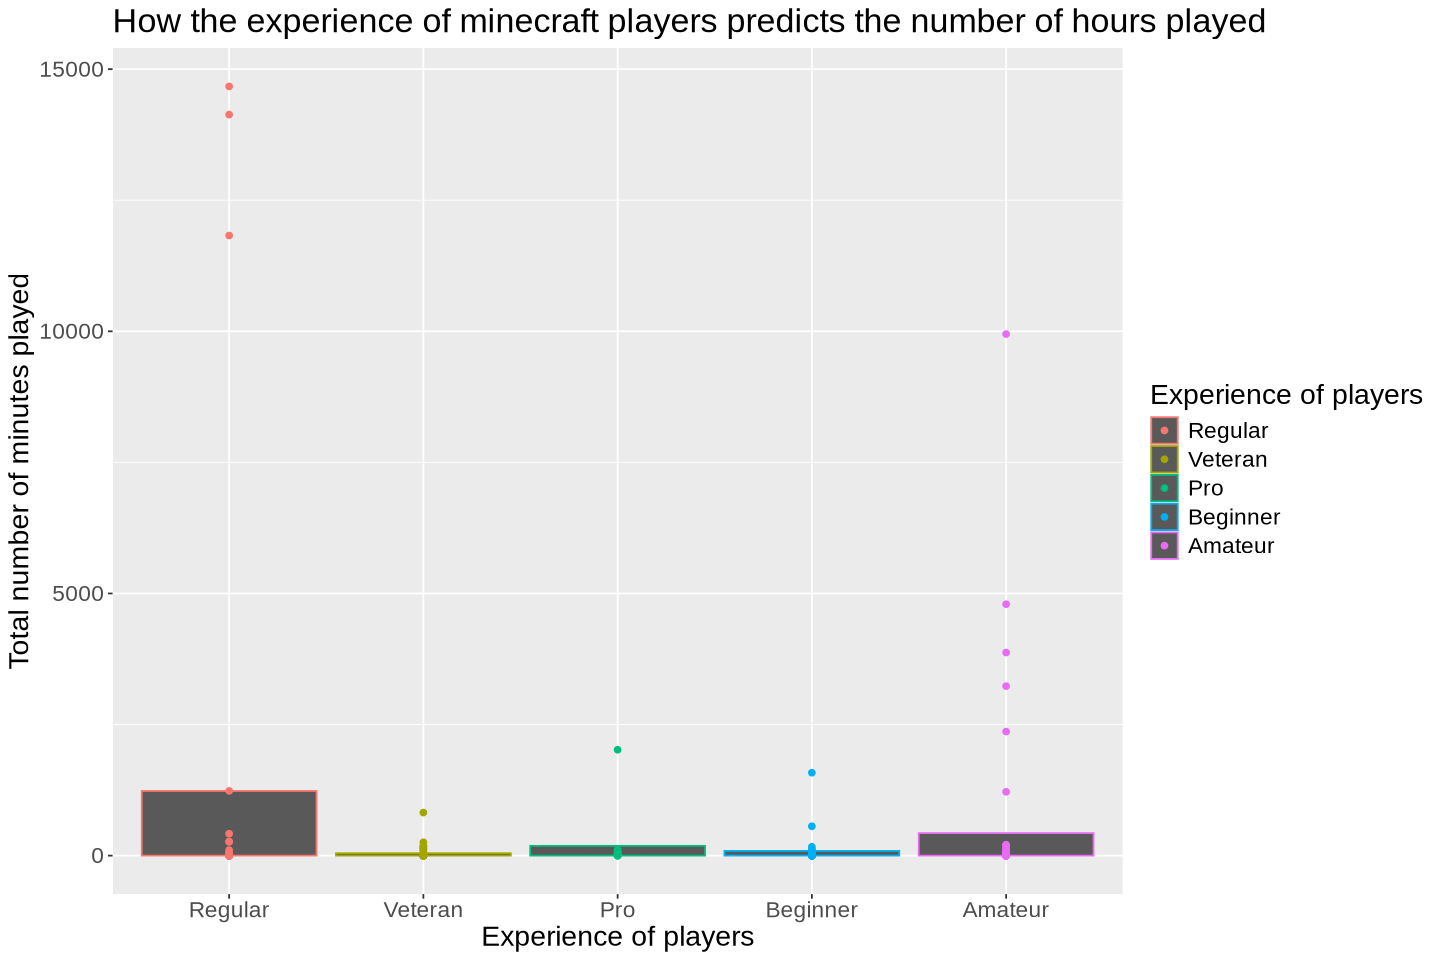

In [31]:
#visualize how age and played hours are related

options(repr.plot.width = 12, repr.plot.height = 8)

age_v_hours <- player_sessions |>
    ggplot( aes(x = experience, y = total_mins, colour = experience)) +
    geom_bar(stat = "summary", fun = "mean") +
    geom_point() + 
    #facet_grid(cols = vars(experience))	+
    ggtitle("How the experience of minecraft players predicts the number of hours played") +  
    labs(x = "Experience of players", y = "Total number of minutes played", colour = "Experience of players") +
    theme(text = element_text(size = 17))

age_v_hours

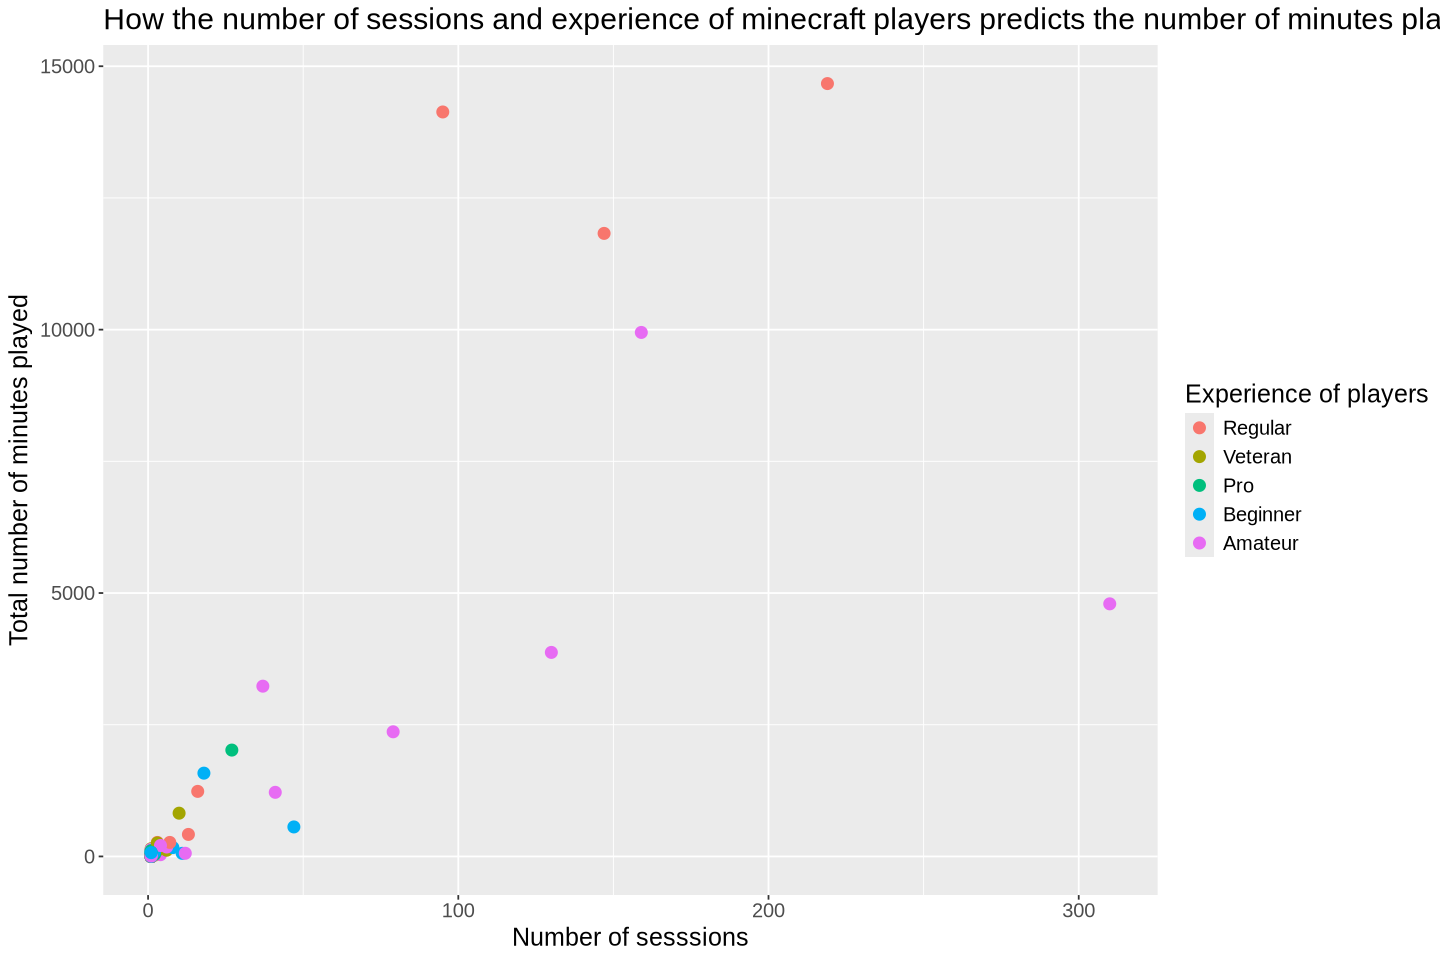

In [68]:
options(repr.plot.width = 12, repr.plot.height = 8)

age_v_hours <- player_sessions |>
    ggplot(aes(x =  total_sessions, y = total_mins, colour = experience)) + 
    geom_point(size = 3) + 
    ggtitle("How the number of sessions and experience of minecraft players predicts the number of minutes played") +  
    labs(x = "Number of sesssions", y = "Total number of minutes played", colour = "Experience of players") +
    theme(text = element_text(size = 15))

age_v_hours


In [69]:
#convert experience to a numerical variable
players_ranked <- player_sessions |>
    mutate(experience_rank = case_when(
        experience == "Amateur"  ~ 0,
        experience == "Beginner" ~ 1,
        experience == "Regular"  ~ 2,
        experience == "Pro"      ~ 3, 
        experience == "Veteran"  ~ 4,
    ))

In [38]:
player_sessions_split <- initial_split(players_ranked, prop = 0.75, strata = total_mins)
player_sessions_train <- training(player_sessions_split)
player_sessions_test <- testing(player_sessions_split)

In [59]:
ps_recipe <- recipe(total_mins ~ total_sessions + experience, data = player_sessions_train) |>
    step_scale(total_sessions) |>
    step_center(total_sessions)
#check whether or not to use all predictors

ps_spec <- nearest_neighbor(weight_func = "rectangular", 
                            neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

ps_vfold <- vfold_cv(player_sessions_train, v = 5, strata = total_mins)

ps_wkflw <- workflow() |>
    add_recipe(ps_recipe) |>
    add_model(ps_spec)
ps_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [53]:
#compute metrics (RMPSE) to determine the best k

set.seed(2019) #set seed
# I'll change the gridvalues to ones that make sense later
gridvals <- tibble(neighbors = seq(from = 1, to = 98, by = 2))

ps_results <- ps_wkflw |>
    tune_grid(resamples = ps_vfold, grid = gridvals) |>
    collect_metrics()


ps_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1472.6779960,5,399.00903877,Preprocessor1_Model01
1,rsq,standard,0.8840355,5,0.04146415,Preprocessor1_Model01
3,rmse,standard,1011.3018173,5,296.07953067,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
95,rsq,standard,0.8724906,5,0.07704988,Preprocessor1_Model48
97,rmse,standard,1487.4567877,5,599.91659157,Preprocessor1_Model49
97,rsq,standard,0.8989946,5,0.05272465,Preprocessor1_Model49


In [55]:
set.seed(2019)

ps_min <- ps_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
ps_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,1011.302,5,296.0795,Preprocessor1_Model02


In [56]:
set.seed(1234) # DO NOT REMOVE

k_min <- ps_min |>
          pull(neighbors)

ps_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

ps_best_fit <- workflow() |>
          add_recipe(ps_recipe) |>
          add_model(ps_best_spec) |>
          fit(data = player_sessions_train)

ps_summary <- ps_best_fit |>
           predict(player_sessions_test) |>
           bind_cols(player_sessions_test) |>
           metrics(truth = total_mins, estimate = .pred)

# your code here
ps_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,640.7872762
rsq,standard,0.8555961
mae,standard,177.9600000


In [57]:
set.seed(2019) # DO NOT CHANGE

options(repr.plot.width = 7, repr.plot.height = 7)

# your code here

ps_preds <- ps_best_fit |>
           predict(player_sessions_train) |>
           bind_cols(player_sessions_train) 

head(ps_preds)

.pred,hashedEmail,total_sessions,experience,age,total_mins,experience_rank
<dbl>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>
3.333333,055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1,Veteran,17,0,4
3.333333,11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,Veteran,19,10,4
3.333333,1683a3e0aed65119f83540274ff6f965fdf66890613a80f88572dfb1d9f1d2ad,1,Amateur,17,0,0
3.333333,171d3c323c6430ffe0722c931f4cced5c48935f6804e0ff250964e4c41da55b1,1,Veteran,17,0,4
3.333333,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,1,Amateur,21,5,0
3.333333,1edebbf13898dbe99da5ee743b1fd9cbfdc6d69f1180dd6261da662bacb1a7e5,1,Veteran,17,0,4


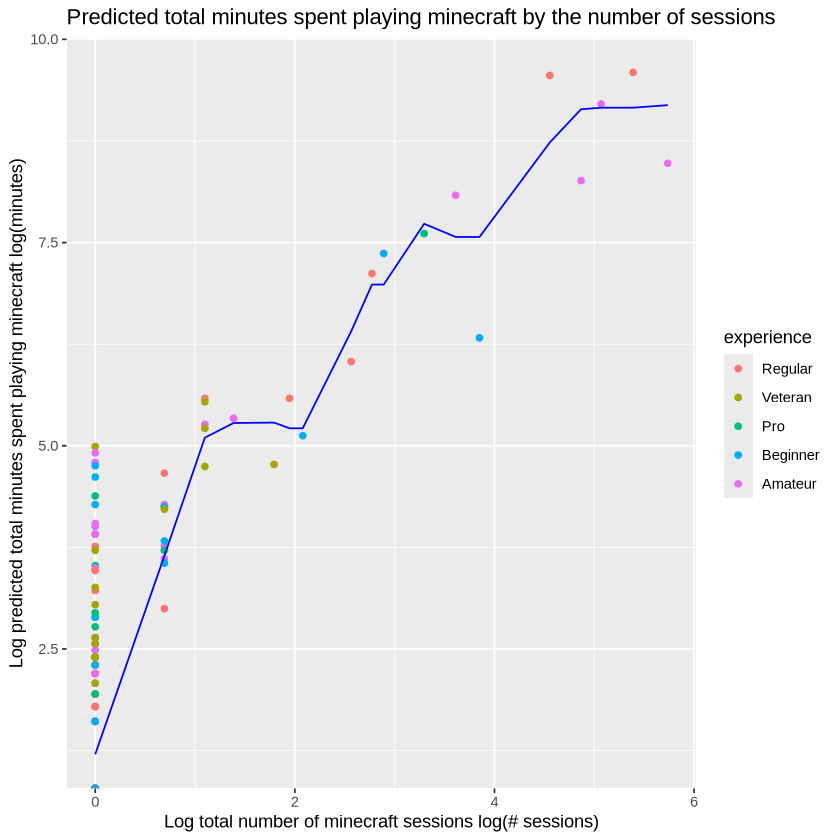

In [65]:
ps_plot <- ps_preds |>
            ggplot(aes(x = log(total_sessions), y = log(total_mins), color = experience)) + 
            geom_point() + 
            geom_line(aes(x = log(total_sessions), y = log(.pred)), color = "blue") + 
            ggtitle("Predicted total minutes spent playing minecraft by the number of sessions") +
            xlab("Log total number of minecraft sessions log(# sessions)") + 
            ylab("Log predicted total minutes spent playing minecraft log(minutes)")

ps_plot